In [1]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [2]:
bank_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [3]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank_df[~bank_df.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [5]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
bank_df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [7]:
bank_df.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [8]:
#2. Study the data distribution in each attribute, share your findings.

#Answer: 

#Attributes explanation:

#ID: Customer ID, no practical meaning. This can be dropped.

#Age: Customer's age in completed years, numerical variable.

#Experience: work experience, numerical variable.

#Income: Annual income of the customer ($000), numerical variable.

#ZIP_Code: Zip code of the customer's home, this can to be treated as a string.

#Family: Family size of the customer, discrete numerical variable.

#CCAvg: monthly credit card repayment amount, numerical variable.

#Education: education level, discrete numerical variables, 1 for ungraduate, 2 for graduates, 3 for Advanced/Professional.

#Mortgage: Value of house mortgage if any. ($000), numerical variable.

#Personal_Loan: If customer accepted to take loan in the previous campaign, Boolean variable.

#Securities_Account: Is there a secret account at the bank,discrete numerical variable. 1 is Yes and 0 is No.

#CD_Account: Is there a deposit account at the bank, discrete numerical variable. 1 is Yes and 0 is No.

#Online: Does the customer use internet banking facilities, discrete numerical variable. 1 is Yes and 0 is No.

#CreditCard: IDoes the customer use a credit card, discrete numerical variable. 1 is Yes and 0 is No.

In [9]:
bank_df = bank_df.drop("ID", axis=1)

In [10]:
#Check the data types of all the columns.
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [11]:
#Correlation analysis
bank_df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


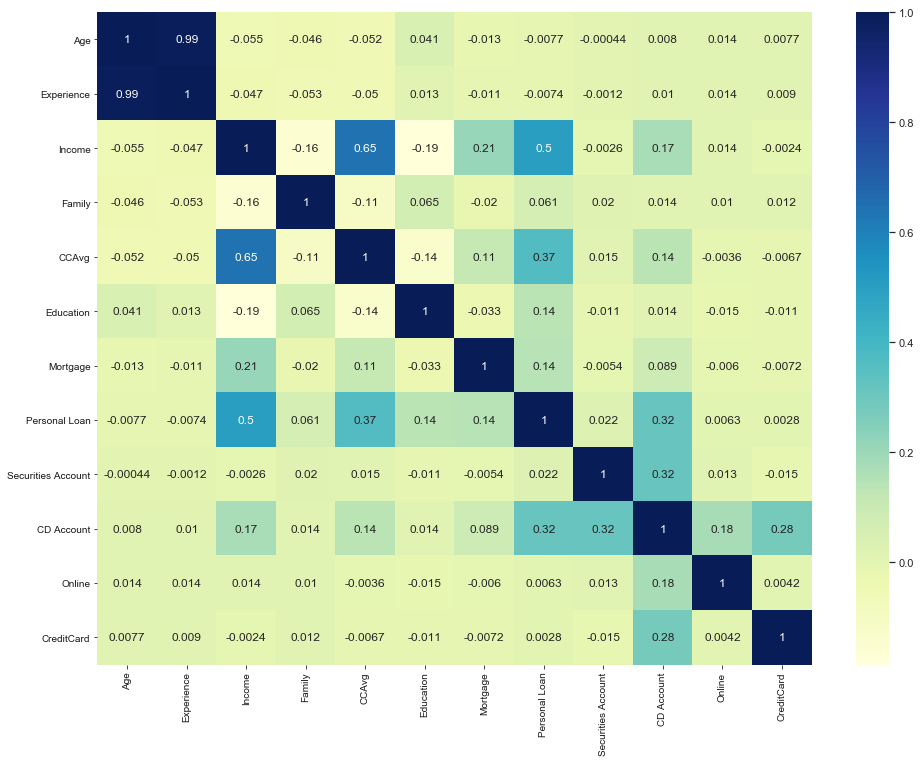

In [12]:
#Correlation analysis using heat map
f, ax = plt.subplots(figsize=(16, 12))
sns.set()
sns.heatmap(bank_df[['Age','Experience','Income','Family','CCAvg', 'Education', 'Mortgage', 'Personal Loan',\
'Securities Account','CD Account','Online','CreditCard']].corr(),annot=True,cmap='YlGnBu')


#Age and Experience are highly corelated.
#Income and Average spending on credit cards are highly corelated.
#Income and Personal loan have moderately high corelation.
#Average spending on credit cards and Personal loan have moderately high corelation.

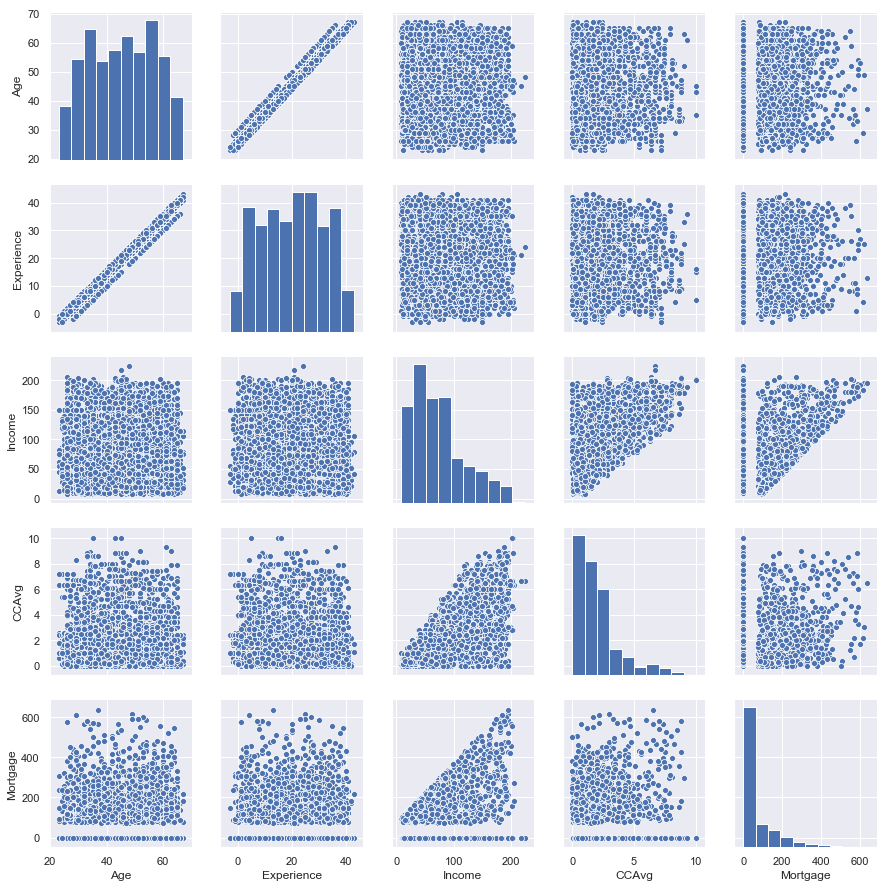

In [13]:
#Plot continous numeric variables.
sns.pairplot(bank_df.loc[:,['Age','Experience','Income','CCAvg','Mortgage']])

C:\Users\ananth.ranganatha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ananth.ranganatha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ananth.ranganatha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ananth.ranganatha\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83

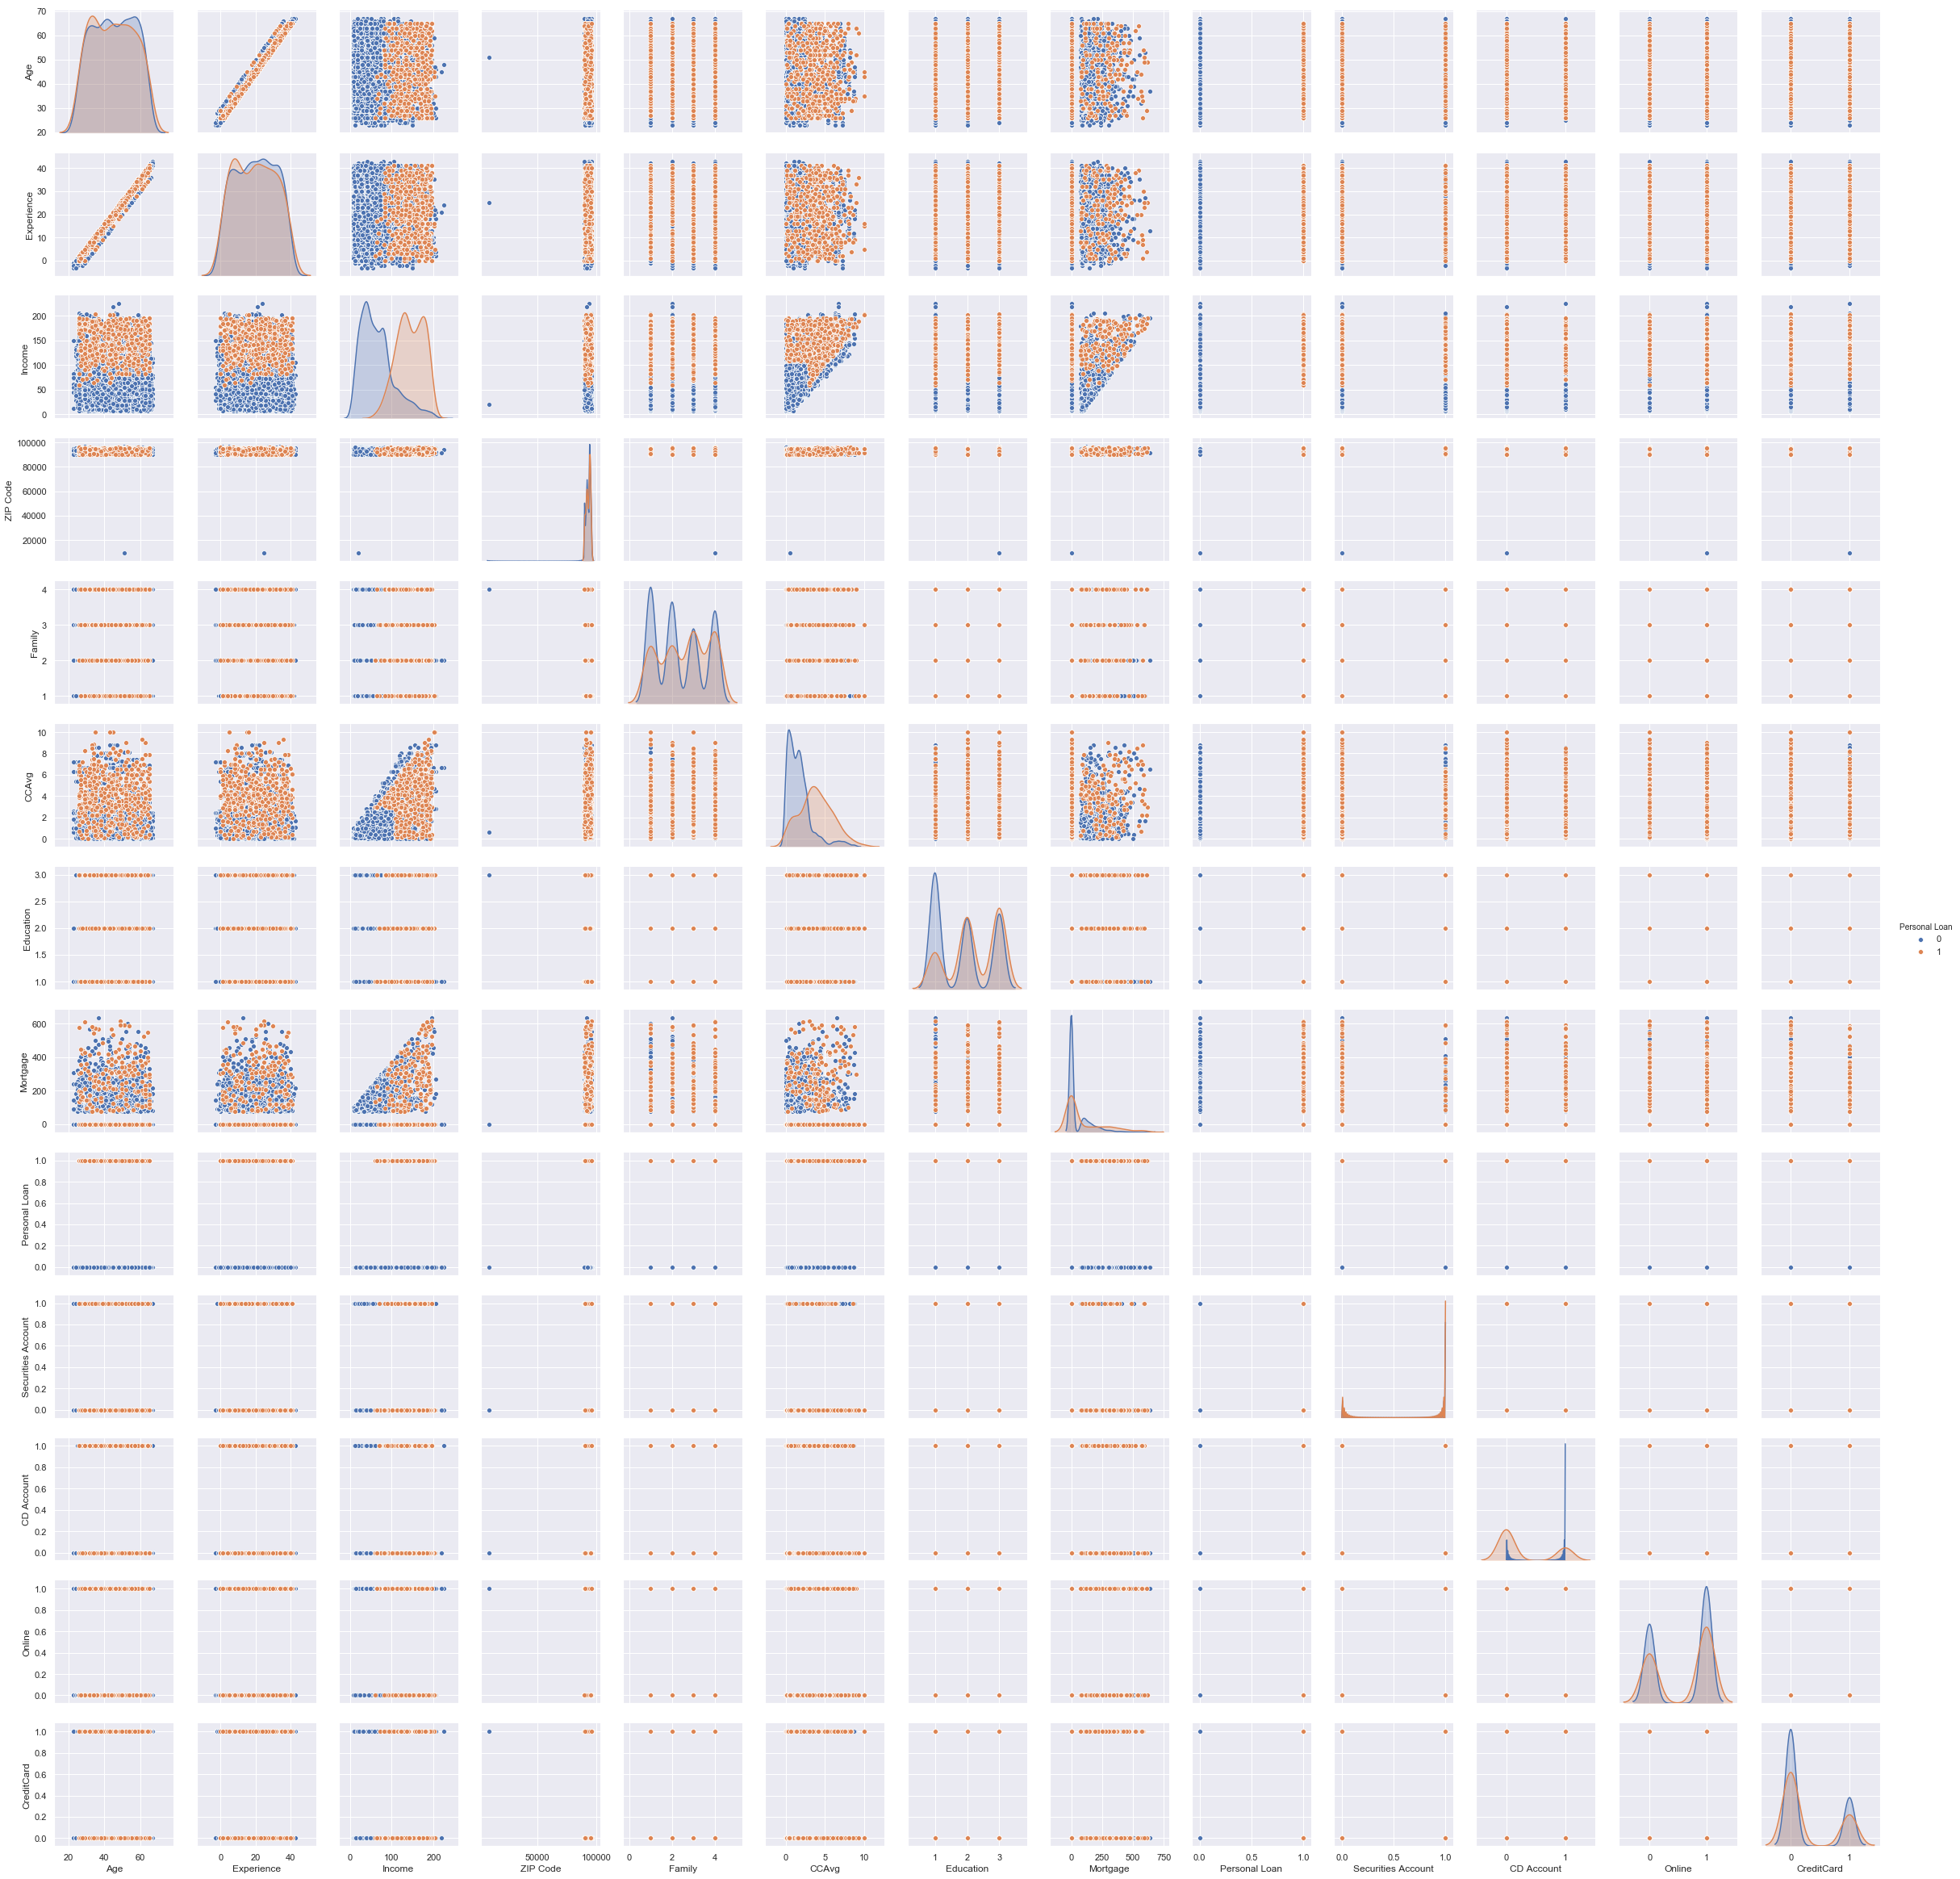

In [14]:
# keeping status as the label to be predicted draw the graph.
import seaborn as sns
sns.pairplot(bank_df,diag_kind='kde', hue = 'Personal Loan')

In [15]:
# From the above graph we can see that higher income people are more willing to apply for loans than low-income people.

In [16]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
X_std =  bank_df.drop("Personal Loan", axis=1)
y =  bank_df.pop("Personal Loan")
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, random_state=2)

In [17]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9053333333333333
[[1319   43]
 [  99   39]]


In [18]:
# Improve the model -----------------------------Iteration 2 -----------------------------------------------

In [19]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries
from sklearn import preprocessing
# scale all the columns of the dataframe.
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [20]:
# Fit the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9366666666666666
[[1330   32]
 [  63   75]]


In [21]:
#0.9366666666666666
#[[1330   32]
# [  63   75]]

#Analyzing the confusion matrix

#True Positives (TP): we correctly predicted that customers opted for loan is 75

#True Negatives (TN): we correctly predicted that customers did not opt for loan is 1330.

#False Positives (FP): we incorrectly predicted that customers did not opt for a loan(a "Type I error") 32 Falsely predict positive Type I error

#False Negatives (FN): we incorrectly predicted that customers opted for a loan (a "Type II error") 63 Falsely predict negative Type II error


In [22]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model1 = GaussianNB()
model1.fit(X_train, y_train)

GaussianNB(priors=None)

In [23]:
model1.score(X_test, y_test)

0.8926666666666667

In [24]:
y_predict1 = model1.predict(X_test)
model_score1 = model.score(X_test, y_test)
print(model1.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict1))

0.8926666666666667
[[1267   95]
 [  66   72]]


In [25]:
#0.8926666666666667
#[[1267   95]
# [  66   72]]

#Analyzing the confusion matrix

#True Positives (TP): we correctly predicted that customers opted for loan is 72

#True Negatives (TN): we correctly predicted that customers did not opt for loan is 1267.

#False Positives (FP): we incorrectly predicted that customers did not opt for a loan(a "Type I error") 95 Falsely predict positive Type I error

#False Negatives (FN): we incorrectly predicted that customers opted for a loan (a "Type II error") 66 Falsely predict negative Type II error


In [26]:
# From the point of view of accuracy LogisticRegression model is better than Naïve Bayes model.

In [27]:
# Classification report for scaled Logistic regression model to find the recall, precision, and the f1-score
Dt_cr=metrics.classification_report(y_test , y_predict)
print(Dt_cr)

             precision    recall  f1-score   support

          0       0.95      0.98      0.97      1362
          1       0.70      0.54      0.61       138

avg / total       0.93      0.94      0.93      1500



In [28]:
# Classification report for Naïve Bayes model to find the recall, precision, and the f1-score
Dt_cr1=metrics.classification_report(y_test , y_predict1)
print(Dt_cr1)

             precision    recall  f1-score   support

          0       0.95      0.93      0.94      1362
          1       0.43      0.52      0.47       138

avg / total       0.90      0.89      0.90      1500



In [29]:
# As seen even by the classification report, the precision, f1-score and accuracy for predicting a 1 which is a person
# who had opted for a loan is more for scaled Logistic regression model compared to NB model, so the best model which 
# can be chosen is Logistic regression model.